In [1]:
%pip install pandas scipy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from itertools import combinations

## Study of relevance estimates distribution

This part explores the differences in distribution of relevance estimates produced by different versions of PropCare

In [ ]:
df_orig_orig = pd.read_csv("./results/default/orig/d/orig/pred/df_sorted.csv")
df_pers_orig = pd.read_csv("./results/default/orig/p/orig/pred/df_sorted.csv")
df_orig_mod = pd.read_csv("./results/default/mod/d/orig/pred/df_sorted.csv")
df_pers_mod = pd.read_csv("./results/default/mod/p/orig/pred/df_sorted.csv")

<Axes: xlabel='relevance_estimate', ylabel='Density'>

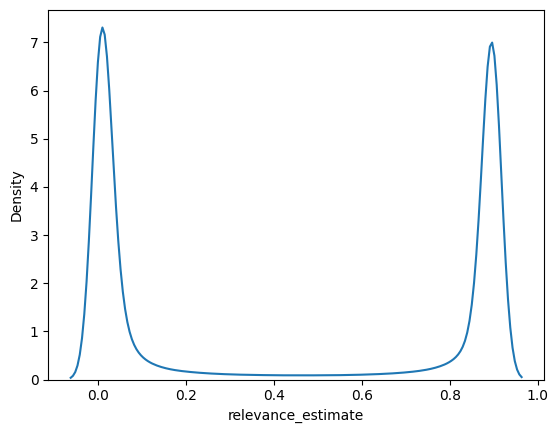

In [15]:
sns.kdeplot(df_orig_orig["relevance_estimate"])

<Axes: xlabel='relevance_estimate', ylabel='Density'>

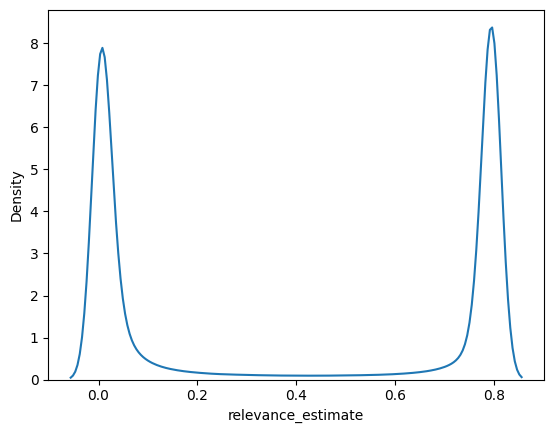

In [16]:
sns.kdeplot(df_pers_orig["relevance_estimate"])

<Axes: xlabel='relevance_estimate', ylabel='Density'>

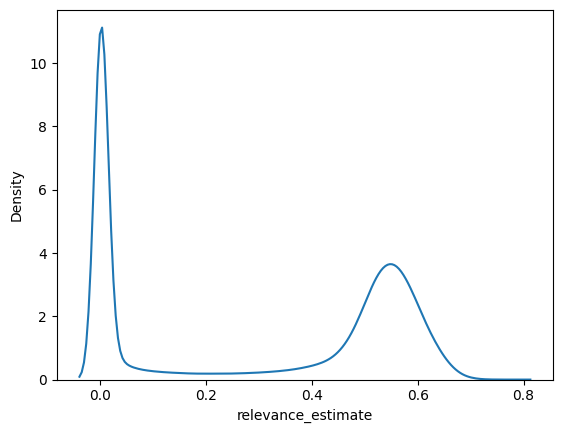

In [17]:
sns.kdeplot(df_orig_mod["relevance_estimate"])

<Axes: xlabel='relevance_estimate', ylabel='Density'>

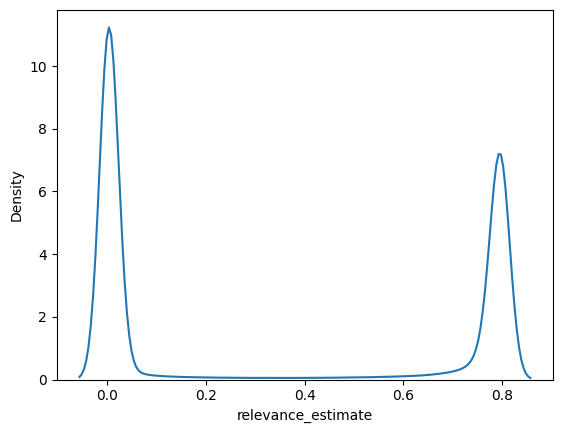

In [18]:
sns.kdeplot(df_pers_mod["relevance_estimate"])

## Study of differences in recommendations

This part explores the differences in recommendation lists produced by different versions of DLCE ranking (before modified PropCare implementation) and relevance estimates

In [ ]:
df_stand_orig = pd.read_csv("./results/default/orig/d/orig/pred/df_sorted.csv")
df_stand_pers = pd.read_csv("./results/default/orig/p/orig/pred/df_sorted.csv")
df_freq_orig = pd.read_csv("./results/default/orig/d/orig/pred_freq/df_sorted.csv")
df_freq_pers = pd.read_csv("./results/default/orig/p/orig/pred_freq/df_sorted.csv")
df_pp_orig = pd.read_csv("./results/default/orig/d/orig/personal_popular/df_sorted.csv")
df_pp_pers = pd.read_csv("./results/default/orig/p/orig/personal_popular/df_sorted.csv")

df_stand_orig.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_stand_pers.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_freq_orig.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_freq_pers.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_pp_orig.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_pp_pers.drop(['Unnamed: 0'], axis = 1, inplace = True)

<Axes: >

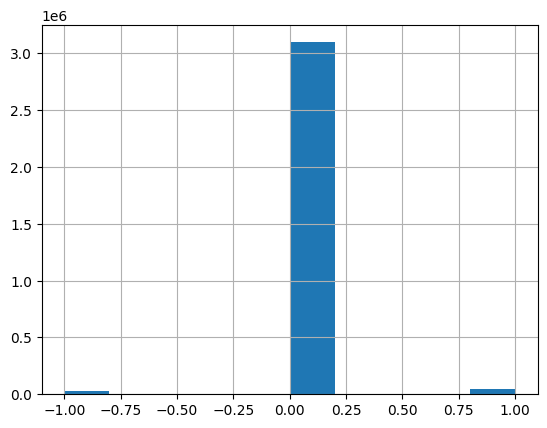

In [69]:
df_stand_orig['causal_effect'].hist()

<Axes: >

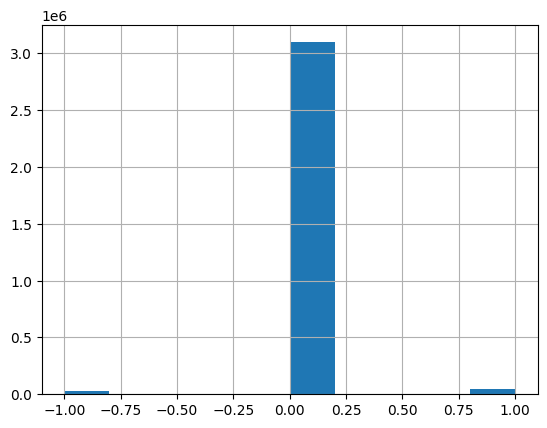

In [70]:
df_stand_pers['causal_effect'].hist()

In [71]:
df_stand_rel_orig = df_stand_orig.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)
df_stand_rel_pers = df_stand_pers.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)
df_freq_rel_orig = df_freq_orig.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)
df_freq_rel_pers = df_freq_pers.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)
df_pp_rel_orig = df_pp_orig.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)
df_pp_rel_pers = df_pp_pers.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)

In [72]:
df_stand_orig['rank'] = np.tile(np.arange(len(pd.unique(df_stand_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_stand_orig['idx_user'])))
df_stand_pers['rank'] = np.tile(np.arange(len(pd.unique(df_stand_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_stand_pers['idx_user'])))
df_freq_orig['rank'] = np.tile(np.arange(len(pd.unique(df_freq_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_freq_orig['idx_user'])))
df_freq_pers['rank'] = np.tile(np.arange(len(pd.unique(df_freq_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_freq_pers['idx_user'])))
df_pp_orig['rank'] = np.tile(np.arange(len(pd.unique(df_pp_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_pp_orig['idx_user'])))
df_pp_pers['rank'] = np.tile(np.arange(len(pd.unique(df_pp_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_pp_pers['idx_user'])))

df_stand_rel_orig['rank'] = np.tile(np.arange(len(pd.unique(df_stand_rel_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_stand_rel_orig['idx_user'])))
df_stand_rel_orig = df_stand_rel_orig.sort_values(by=['idx_user', 'pred'], ascending=False)

df_stand_rel_pers['rank'] = np.tile(np.arange(len(pd.unique(df_stand_rel_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_stand_rel_pers['idx_user'])))
df_stand_rel_pers = df_stand_rel_pers.sort_values(by=['idx_user', 'pred'], ascending=False)

df_freq_rel_orig['rank'] = np.tile(np.arange(len(pd.unique(df_freq_rel_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_freq_rel_orig['idx_user'])))
df_freq_rel_orig = df_freq_rel_orig.sort_values(by=['idx_user', 'pred'], ascending=False)

df_freq_rel_pers['rank'] = np.tile(np.arange(len(pd.unique(df_freq_rel_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_freq_rel_pers['idx_user'])))
df_freq_rel_pers = df_freq_rel_pers.sort_values(by=['idx_user', 'pred'], ascending=False)

df_pp_rel_orig['rank'] = np.tile(np.arange(len(pd.unique(df_pp_rel_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_pp_rel_orig['idx_user'])))
df_pp_rel_orig = df_pp_rel_orig.sort_values(by=['idx_user', 'pred'], ascending=False)

df_pp_rel_pers['rank'] = np.tile(np.arange(len(pd.unique(df_pp_rel_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_pp_rel_pers['idx_user'])))
df_pp_rel_pers = df_pp_rel_pers.sort_values(by=['idx_user', 'pred'], ascending=False)

In [73]:
rank_diff = df_stand_orig['rank'] - df_stand_rel_orig['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_stand_orig): ', rank_diff_avg)

rank_diff = df_freq_orig['rank'] - df_freq_rel_orig['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_freq_orig): ', rank_diff_avg)

rank_diff = df_pp_orig['rank'] - df_pp_rel_orig['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_pp_orig): ', rank_diff_avg)

rank_diff = df_stand_pers['rank'] - df_stand_rel_pers['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_stand_pers): ', rank_diff_avg)

rank_diff = df_freq_pers['rank'] - df_freq_rel_pers['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_freq_pers): ', rank_diff_avg)

rank_diff = df_pp_pers['rank'] - df_pp_rel_pers['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_pp_pers): ', rank_diff_avg)

Average rank difference (df_stand_orig):  486.40811844133805
Average rank difference (df_freq_orig):  495.9260215129794
Average rank difference (df_pp_orig):  674.2837565515596
Average rank difference (df_stand_pers):  498.15151321928266
Average rank difference (df_freq_pers):  503.24121797453745
Average rank difference (df_pp_pers):  667.7532238534218


In [74]:
tau, p_value = kendalltau(df_stand_orig['rank'], df_stand_rel_orig['rank'])
print("Kendall tau (df_stand_orig): ", tau)
tau, p_value = kendalltau(df_freq_orig['rank'], df_freq_rel_orig['rank'])
print("Kendall tau (df_freq_orig): ", tau)
tau, p_value = kendalltau(df_pp_orig['rank'], df_pp_rel_orig['rank'])
print("Kendall tau (df_pp_orig): ", tau)
tau, p_value = kendalltau(df_stand_pers['rank'], df_stand_rel_pers['rank'])
print("Kendall tau (df_stand_pers): ", tau)
tau, p_value = kendalltau(df_freq_pers['rank'], df_freq_rel_pers['rank'])
print("Kendall tau (df_freq_pers): ", tau)
tau, p_value = kendalltau(df_pp_pers['rank'], df_pp_rel_pers['rank'])
print("Kendall tau (df_pp_pers): ", tau)

Kendall tau (df_stand_orig):  -0.02553336131197327
Kendall tau (df_freq_orig):  -0.025646636152438278
Kendall tau (df_pp_orig):  -0.02998029639407502
Kendall tau (df_stand_pers):  -0.07757005174107097
Kendall tau (df_freq_pers):  -0.0775850605562692
Kendall tau (df_pp_pers):  -0.0781958591137477


In [ ]:
def top_n_overlap(df1, df2, n=10):
    overlap_scores = []
    
    for user in pd.unique(df1['idx_user']):
        user_top_df1 = set(df1[df1['idx_user'] == user].nsmallest(n, 'rank')['idx_item'])
        user_top_df2 = set(df2[df2['idx_user'] == user].nsmallest(n, 'rank')['idx_item'])
        overlap = len(user_top_df1 & user_top_df2) / n
        overlap_scores.append(overlap)
    
    return sum(overlap_scores) / len(overlap_scores) if overlap_scores else 0

In [ ]:
i = 0
for (df_sorted, df_sorted_rel_compare) in [(df_stand_orig, df_stand_rel_orig), 
                                           (df_freq_orig, df_freq_rel_orig),
                                           (df_pp_orig, df_pp_rel_orig), 
                                           (df_stand_pers, df_stand_rel_pers), 
                                           (df_freq_pers, df_freq_rel_pers),
                                           (df_pp_pers, df_pp_rel_pers)]:
    if (i == 0):
        print("Results for df_stand_orig: ")
    elif (i == 1):
        print("Results for df_freq_orig: ")
    elif (i == 2):
        print("Results for df_pp_orig: ")
    elif (i == 3):
        print("Results for df_stand_pers: ")
    elif (i == 4):
        print("Results for df_freq_pers: ")
    elif (i == 5):
        print("Results for df_pp_pers: ")
    overlap_score = top_n_overlap(df_sorted, df_sorted_rel_compare, 10)
    print('Top 10 overlap score: ', overlap_score)
    overlap_score = top_n_overlap(df_sorted, df_sorted_rel_compare, 100)
    print('Top 100 overlap score: ', overlap_score)
    i += 1
    print()

Results for df_stand_orig: 
Top 10 overlap score:  0.0
Top 100 overlap score:  3.03161541792984e-05

Results for df_freq_orig: 
Top 10 overlap score:  8.6617583369424e-05
Top 100 overlap score:  0.0002598527501082722

Results for df_pp_orig: 
Top 10 overlap score:  0.001732351667388481
Top 100 overlap score:  0.007371156344737903

Results for df_stand_pers: 
Top 10 overlap score:  0.0
Top 100 overlap score:  1.2992637505413598e-05

Results for df_freq_pers: 
Top 10 overlap score:  8.6617583369424e-05
Top 100 overlap score:  0.0003291468168038114

Results for df_pp_pers: 
Top 10 overlap score:  0.0017323516673884807
Top 100 overlap score:  0.009592897358163748



This part explores the differences in recommendation lists produced by different versions of DLCE ranking (before ITE(R) implementation) and relevance estimates

In [ ]:
df_stand_orig = pd.read_csv("./results/default/mod/d/orig/pred/df_sorted.csv")
df_stand_pers = pd.read_csv("./results/default/mod/p/orig/pred/df_sorted.csv")
df_freq_orig = pd.read_csv("./results/default/mod/d/orig/pred_freq/df_sorted.csv")
df_freq_pers = pd.read_csv("./results/default/mod/p/orig/pred_freq/df_sorted.csv")
df_pp_orig = pd.read_csv("./results/default/mod/d/orig/personal_popular/df_sorted.csv")
df_pp_pers = pd.read_csv("./results/default/mod/p/orig/personal_popular/df_sorted.csv")

df_stand_orig.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_stand_pers.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_freq_orig.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_freq_pers.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_pp_orig.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_pp_pers.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [76]:
df_stand_rel_orig = df_stand_orig.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)
df_stand_rel_pers = df_stand_pers.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)
df_freq_rel_orig = df_freq_orig.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)
df_freq_rel_pers = df_freq_pers.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)
df_pp_rel_orig = df_pp_orig.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)
df_pp_rel_pers = df_pp_pers.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)

In [77]:
df_stand_orig['rank'] = np.tile(np.arange(len(pd.unique(df_stand_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_stand_orig['idx_user'])))
df_stand_pers['rank'] = np.tile(np.arange(len(pd.unique(df_stand_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_stand_pers['idx_user'])))
df_freq_orig['rank'] = np.tile(np.arange(len(pd.unique(df_freq_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_freq_orig['idx_user'])))
df_freq_pers['rank'] = np.tile(np.arange(len(pd.unique(df_freq_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_freq_pers['idx_user'])))
df_pp_orig['rank'] = np.tile(np.arange(len(pd.unique(df_pp_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_pp_orig['idx_user'])))
df_pp_pers['rank'] = np.tile(np.arange(len(pd.unique(df_pp_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_pp_pers['idx_user'])))

df_stand_rel_orig['rank'] = np.tile(np.arange(len(pd.unique(df_stand_rel_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_stand_rel_orig['idx_user'])))
df_stand_rel_orig = df_stand_rel_orig.sort_values(by=['idx_user', 'pred'], ascending=False)

df_stand_rel_pers['rank'] = np.tile(np.arange(len(pd.unique(df_stand_rel_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_stand_rel_pers['idx_user'])))
df_stand_rel_pers = df_stand_rel_pers.sort_values(by=['idx_user', 'pred'], ascending=False)

df_freq_rel_orig['rank'] = np.tile(np.arange(len(pd.unique(df_freq_rel_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_freq_rel_orig['idx_user'])))
df_freq_rel_orig = df_freq_rel_orig.sort_values(by=['idx_user', 'pred'], ascending=False)

df_freq_rel_pers['rank'] = np.tile(np.arange(len(pd.unique(df_freq_rel_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_freq_rel_pers['idx_user'])))
df_freq_rel_pers = df_freq_rel_pers.sort_values(by=['idx_user', 'pred'], ascending=False)

df_pp_rel_orig['rank'] = np.tile(np.arange(len(pd.unique(df_pp_rel_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_pp_rel_orig['idx_user'])))
df_pp_rel_orig = df_pp_rel_orig.sort_values(by=['idx_user', 'pred'], ascending=False)

df_pp_rel_pers['rank'] = np.tile(np.arange(len(pd.unique(df_pp_rel_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_pp_rel_pers['idx_user'])))
df_pp_rel_pers = df_pp_rel_pers.sort_values(by=['idx_user', 'pred'], ascending=False)

In [78]:
rank_diff = df_stand_orig['rank'] - df_stand_rel_orig['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_stand_orig): ', rank_diff_avg)

rank_diff = df_freq_orig['rank'] - df_freq_rel_orig['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_freq_orig): ', rank_diff_avg)

rank_diff = df_pp_orig['rank'] - df_pp_rel_orig['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_pp_orig): ', rank_diff_avg)

rank_diff = df_stand_pers['rank'] - df_stand_rel_pers['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_stand_pers): ', rank_diff_avg)

rank_diff = df_freq_pers['rank'] - df_freq_rel_pers['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_freq_pers): ', rank_diff_avg)

rank_diff = df_pp_pers['rank'] - df_pp_rel_pers['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_pp_pers): ', rank_diff_avg)

Average rank difference (df_stand_orig):  354.00533973411177
Average rank difference (df_freq_orig):  359.71003880114193
Average rank difference (df_pp_orig):  494.1869797105256
Average rank difference (df_stand_pers):  414.76302325669485
Average rank difference (df_freq_pers):  418.0749867106405
Average rank difference (df_pp_pers):  542.6320217377305


In [79]:
tau, p_value = kendalltau(df_stand_orig['rank'], df_stand_rel_orig['rank'])
print("Kendall tau (df_stand_orig): ", tau)
tau, p_value = kendalltau(df_freq_orig['rank'], df_freq_rel_orig['rank'])
print("Kendall tau (df_freq_orig): ", tau)
tau, p_value = kendalltau(df_pp_orig['rank'], df_pp_rel_orig['rank'])
print("Kendall tau (df_pp_orig): ", tau)
tau, p_value = kendalltau(df_stand_pers['rank'], df_stand_rel_pers['rank'])
print("Kendall tau (df_stand_pers): ", tau)
tau, p_value = kendalltau(df_freq_pers['rank'], df_freq_rel_pers['rank'])
print("Kendall tau (df_freq_pers): ", tau)
tau, p_value = kendalltau(df_pp_pers['rank'], df_pp_rel_pers['rank'])
print("Kendall tau (df_pp_pers): ", tau)

Kendall tau (df_stand_orig):  0.23445531505779413
Kendall tau (df_freq_orig):  0.23445051003602085
Kendall tau (df_pp_orig):  0.2343828995785421
Kendall tau (df_stand_pers):  0.12690277128791483
Kendall tau (df_freq_pers):  0.12689630998654536
Kendall tau (df_pp_pers):  0.12679133920848693


In [ ]:
i = 0
for (df_sorted, df_sorted_rel_compare) in [(df_stand_orig, df_stand_rel_orig), 
                                           (df_freq_orig, df_freq_rel_orig),
                                           (df_pp_orig, df_pp_rel_orig), 
                                           (df_stand_pers, df_stand_rel_pers), 
                                           (df_freq_pers, df_freq_rel_pers),
                                           (df_pp_pers, df_pp_rel_pers)]:
    if (i == 0):
        print("Results for df_stand_orig: ")
    elif (i == 1):
        print("Results for df_freq_orig: ")
    elif (i == 2):
        print("Results for df_pp_orig: ")
    elif (i == 3):
        print("Results for df_stand_pers: ")
    elif (i == 4):
        print("Results for df_freq_pers: ")
    elif (i == 5):
        print("Results for df_pp_pers: ")
    overlap_score = top_n_overlap(df_sorted, df_sorted_rel_compare, 10)
    print('Top 10 overlap score: ', overlap_score)
    overlap_score = top_n_overlap(df_sorted, df_sorted_rel_compare, 100)
    print('Top 100 overlap score: ', overlap_score)
    i += 1
    print()

Results for df_stand_orig: 
Top 10 overlap score:  0.008012126461671718
Top 100 overlap score:  0.12135989605890037

Results for df_freq_orig: 
Top 10 overlap score:  0.009224772628843669
Top 100 overlap score:  0.12182763100909527

Results for df_pp_orig: 
Top 10 overlap score:  0.009441316587267233
Top 100 overlap score:  0.1126634906886104

Results for df_stand_pers: 
Top 10 overlap score:  0.011000433087916879
Top 100 overlap score:  0.060788220008661804

Results for df_freq_pers: 
Top 10 overlap score:  0.013339107838891346
Top 100 overlap score:  0.05944997834560426

Results for df_pp_pers: 
Top 10 overlap score:  0.012776093546990094
Top 100 overlap score:  0.05507145950627968



This part explores the differences in recommendation lists produced by different versions of DLCE ranking (after ITE(R) implementation) and relevance estimates

In [ ]:
df_stand_orig = pd.read_csv("./results/default/mod/d/mod/pred/df_sorted.csv")
df_stand_pers = pd.read_csv("./results/default/mod/p/mod/pred/df_sorted.csv")
df_freq_orig = pd.read_csv("./results/default/mod/d/mod/pred_freq/df_sorted.csv")
df_freq_pers = pd.read_csv("./results/default/mod/p/mod/pred_freq/df_sorted.csv")
df_pp_orig = pd.read_csv("./results/default/mod/d/mod/personal_popular/df_sorted.csv")
df_pp_pers = pd.read_csv("./results/default/mod/p/mod/personal_popular/df_sorted.csv")

df_stand_orig.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_stand_pers.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_freq_orig.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_freq_pers.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_pp_orig.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_pp_pers.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [81]:
df_stand_rel_orig = df_stand_orig.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)
df_stand_rel_pers = df_stand_pers.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)
df_freq_rel_orig = df_freq_orig.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)
df_freq_rel_pers = df_freq_pers.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)
df_pp_rel_orig = df_pp_orig.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)
df_pp_rel_pers = df_pp_pers.sort_values(by=['idx_user', 'relevance_estimate'], ascending=False)

In [82]:
df_stand_orig['rank'] = np.tile(np.arange(len(pd.unique(df_stand_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_stand_orig['idx_user'])))
df_stand_pers['rank'] = np.tile(np.arange(len(pd.unique(df_stand_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_stand_pers['idx_user'])))
df_freq_orig['rank'] = np.tile(np.arange(len(pd.unique(df_freq_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_freq_orig['idx_user'])))
df_freq_pers['rank'] = np.tile(np.arange(len(pd.unique(df_freq_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_freq_pers['idx_user'])))
df_pp_orig['rank'] = np.tile(np.arange(len(pd.unique(df_pp_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_pp_orig['idx_user'])))
df_pp_pers['rank'] = np.tile(np.arange(len(pd.unique(df_pp_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_pp_pers['idx_user'])))

df_stand_rel_orig['rank'] = np.tile(np.arange(len(pd.unique(df_stand_rel_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_stand_rel_orig['idx_user'])))
df_stand_rel_orig = df_stand_rel_orig.sort_values(by=['idx_user', 'pred'], ascending=False)

df_stand_rel_pers['rank'] = np.tile(np.arange(len(pd.unique(df_stand_rel_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_stand_rel_pers['idx_user'])))
df_stand_rel_pers = df_stand_rel_pers.sort_values(by=['idx_user', 'pred'], ascending=False)

df_freq_rel_orig['rank'] = np.tile(np.arange(len(pd.unique(df_freq_rel_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_freq_rel_orig['idx_user'])))
df_freq_rel_orig = df_freq_rel_orig.sort_values(by=['idx_user', 'pred'], ascending=False)

df_freq_rel_pers['rank'] = np.tile(np.arange(len(pd.unique(df_freq_rel_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_freq_rel_pers['idx_user'])))
df_freq_rel_pers = df_freq_rel_pers.sort_values(by=['idx_user', 'pred'], ascending=False)

df_pp_rel_orig['rank'] = np.tile(np.arange(len(pd.unique(df_pp_rel_orig['idx_item']))) + 1, 
                                        len(pd.unique(df_pp_rel_orig['idx_user'])))
df_pp_rel_orig = df_pp_rel_orig.sort_values(by=['idx_user', 'pred'], ascending=False)

df_pp_rel_pers['rank'] = np.tile(np.arange(len(pd.unique(df_pp_rel_pers['idx_item']))) + 1, 
                                        len(pd.unique(df_pp_rel_pers['idx_user'])))
df_pp_rel_pers = df_pp_rel_pers.sort_values(by=['idx_user', 'pred'], ascending=False)

In [83]:
rank_diff = df_stand_orig['rank'] - df_stand_rel_orig['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_stand_orig): ', rank_diff_avg)

rank_diff = df_freq_orig['rank'] - df_freq_rel_orig['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_freq_orig): ', rank_diff_avg)

rank_diff = df_pp_orig['rank'] - df_pp_rel_orig['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_pp_orig): ', rank_diff_avg)

rank_diff = df_stand_pers['rank'] - df_stand_rel_pers['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_stand_pers): ', rank_diff_avg)

rank_diff = df_freq_pers['rank'] - df_freq_rel_pers['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_freq_pers): ', rank_diff_avg)

rank_diff = df_pp_pers['rank'] - df_pp_rel_pers['rank']
rank_diff_avg = np.mean(np.abs(rank_diff))
print('Average rank difference (df_pp_pers): ', rank_diff_avg)

Average rank difference (df_stand_orig):  428.5227951973959
Average rank difference (df_freq_orig):  435.1803078838415
Average rank difference (df_pp_orig):  568.9788500316293
Average rank difference (df_stand_pers):  419.0560924611136
Average rank difference (df_freq_pers):  425.61322723731575
Average rank difference (df_pp_pers):  529.4819113192515


In [84]:
tau, p_value = kendalltau(df_stand_orig['rank'], df_stand_rel_orig['rank'])
print("Kendall tau (df_stand_orig): ", tau)
tau, p_value = kendalltau(df_freq_orig['rank'], df_freq_rel_orig['rank'])
print("Kendall tau (df_freq_orig): ", tau)
tau, p_value = kendalltau(df_pp_orig['rank'], df_pp_rel_orig['rank'])
print("Kendall tau (df_pp_orig): ", tau)
tau, p_value = kendalltau(df_stand_pers['rank'], df_stand_rel_pers['rank'])
print("Kendall tau (df_stand_pers): ", tau)
tau, p_value = kendalltau(df_freq_pers['rank'], df_freq_rel_pers['rank'])
print("Kendall tau (df_freq_pers): ", tau)
tau, p_value = kendalltau(df_pp_pers['rank'], df_pp_rel_pers['rank'])
print("Kendall tau (df_pp_pers): ", tau)

Kendall tau (df_stand_orig):  0.09866997068252525
Kendall tau (df_freq_orig):  0.0986477680313224
Kendall tau (df_pp_orig):  0.09847898561705332
Kendall tau (df_stand_pers):  0.11143855991664543
Kendall tau (df_freq_pers):  0.11132963147528534
Kendall tau (df_pp_pers):  0.11051159583816685


In [ ]:
i = 0
for (df_sorted, df_sorted_rel_compare) in [(df_stand_orig, df_stand_rel_orig), 
                                           (df_freq_orig, df_freq_rel_orig),
                                           (df_pp_orig, df_pp_rel_orig), 
                                           (df_stand_pers, df_stand_rel_pers), 
                                           (df_freq_pers, df_freq_rel_pers),
                                           (df_pp_pers, df_pp_rel_pers)]:
    if (i == 0):
        print("Results for df_stand_orig: ")
    elif (i == 1):
        print("Results for df_freq_orig: ")
    elif (i == 2):
        print("Results for df_pp_orig: ")
    elif (i == 3):
        print("Results for df_stand_pers: ")
    elif (i == 4):
        print("Results for df_freq_pers: ")
    elif (i == 5):
        print("Results for df_pp_pers: ")
    overlap_score = top_n_overlap(df_sorted, df_sorted_rel_compare, 10)
    print('Top 10 overlap score: ', overlap_score)
    overlap_score = top_n_overlap(df_sorted, df_sorted_rel_compare, 100)
    print('Top 100 overlap score: ', overlap_score)
    i += 1
    print()

Results for df_stand_orig: 
Top 10 overlap score:  0.05643135556517887
Top 100 overlap score:  0.054395842355998134

Results for df_freq_orig: 
Top 10 overlap score:  0.021221307925509046
Top 100 overlap score:  0.052239064530099764

Results for df_pp_orig: 
Top 10 overlap score:  0.013858813339107916
Top 100 overlap score:  0.040259852750108543

Results for df_stand_pers: 
Top 10 overlap score:  0.0951927241229953
Top 100 overlap score:  0.11670853183196231

Results for df_freq_pers: 
Top 10 overlap score:  0.06574274577739186
Top 100 overlap score:  0.10262018189692566

Results for df_pp_pers: 
Top 10 overlap score:  0.03395409268081423
Top 100 overlap score:  0.07563880467734978



## Comparison between old and new recommendations

This part analyses the average price and individuality in lists produced by PP recommendations

In [ ]:
df_pp_orig_10 = pd.read_csv("./results/default/mod/d/orig/personal_popular/df_ranking_10.csv")
df_pp_pers_10 = pd.read_csv("./results/default/mod/p/orig/personal_popular/df_ranking_10.csv")

df_pp_orig_100 = pd.read_csv("./results/default/mod/d/orig/personal_popular/df_ranking_100.csv")
df_pp_pers_100 = pd.read_csv("./results/default/mod/p/orig/personal_popular/df_ranking_100.csv")

In [47]:
print("Average price of top-10 recommended items in $ with PP prediction for each user (orig): \n", np.average(df_pp_orig_10.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_pp_orig_10.groupby('idx_user')['item_price'].mean()), end = "\n\n")
print("Average price of top-10 recommended items in $ with PP prediction for each user (personalised): \n", np.average(df_pp_pers_10.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_pp_pers_10.groupby('idx_user')['item_price'].mean()), end = "\n\n")

Average price of top-10 recommended items in $ with PP prediction for each user (orig): 
 2.6257367149048525 +- 0.5204195002920392

Average price of top-10 recommended items in $ with PP prediction for each user (personalised): 
 2.599128650203584 +- 0.5644764762423634



In [48]:
print("Average price of top-100 recommended items in $ for PP prediction (orig): \n", np.average(df_pp_orig_100.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_pp_orig_100.groupby('idx_user')['item_price'].mean()), end = "\n\n")
print("Average price of top-100 recommended items in $ for PP prediction (personalised): \n", np.average(df_pp_pers_100.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_pp_pers_100.groupby('idx_user')['item_price'].mean()), end = "\n\n")

Average price of top-100 recommended items in $ for PP prediction (orig): 
 2.8583533828149057 +- 0.20559484266541356

Average price of top-100 recommended items in $ for PP prediction (personalised): 
 2.8617706667717955 +- 0.2027344663426352



In [ ]:
def compute_personalization(df):
    users = df['idx_user'].unique()
    user_pairs = list(combinations(users, 2))
    jaccard_scores = []
    
    for u1, u2 in user_pairs:
        items_u1 = set(df[df['idx_user'] == u1]['idx_item'])
        items_u2 = set(df[df['idx_user'] == u2]['idx_item'])
        intersection = len(items_u1 & items_u2)
        union = len(items_u1 | items_u2)
        jaccard = intersection / union if union != 0 else 0
        jaccard_scores.append(jaccard)
    
    return 1 - np.mean(jaccard_scores)

personalization_pp_orig_10 = compute_personalization(df_pp_orig_10)
personalization_pp_pers_10 = compute_personalization(df_pp_pers_10)

print(f"Personalization Scores (0=identical, 1=unique) for Top-10 Original:")
print(f"PP approach (orig): {personalization_pp_orig_10:.3f}")
print(f"PP approach (pers): {personalization_pp_pers_10:.3f}")

Personalization Scores (0=identical, 1=unique) for Top-10 Original:
PP approach (orig): 0.879
PP approach (pers): 0.910


This part analyses the difference in recommendation lists produced by two types of DLCE predict (without ITE(R))

In [ ]:
df_stand_orig_10 = pd.read_csv("./results/default/mod/d/orig/pred/df_ranking_10.csv")
df_stand_pers_10 = pd.read_csv("./results/default/mod/p/orig/pred/df_ranking_10.csv")
df_freq_orig_10 = pd.read_csv("./results/default/mod/d/orig/pred_freq/df_ranking_10.csv")
df_freq_pers_10 = pd.read_csv("./results/default/mod/p/orig/pred_freq/df_ranking_10.csv")

df_stand_orig_100 = pd.read_csv("./results/default/mod/d/orig/pred/df_ranking_100.csv")
df_stand_pers_100 = pd.read_csv("./results/default/mod/p/orig/pred/df_ranking_100.csv")
df_freq_orig_100 = pd.read_csv("./results/default/mod/d/orig/pred_freq/df_ranking_100.csv")
df_freq_pers_100 = pd.read_csv("./results/default/mod/p/orig/pred_freq/df_ranking_100.csv")

In [51]:
print("Average price of top-10 recommended items in $ with standard DLCE prediction for each user (orig): \n", np.average(df_stand_orig_10.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_stand_orig_10.groupby('idx_user')['item_price'].mean()), end = "\n\n")
print("Average price of top-10 recommended items in $ with frequency DLCE prediction for each user (orig): \n", np.average(df_freq_orig_10.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_freq_orig_10.groupby('idx_user')['item_price'].mean()), end = "\n\n")
print("Average price of top-10 recommended items in $ with standard DLCE prediction for each user (personalised): \n", np.average(df_stand_pers_10.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_stand_pers_10.groupby('idx_user')['item_price'].mean()), end = "\n\n")
print("Average price of top-10 recommended items in $ with frequency DLCE prediction for each user (personalised): \n", np.average(df_freq_pers_10.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_freq_pers_10.groupby('idx_user')['item_price'].mean()), end = "\n\n")

Average price of top-10 recommended items in $ with standard DLCE prediction for each user (orig): 
 2.505219492798948 +- 0.40568042517721686

Average price of top-10 recommended items in $ with frequency DLCE prediction for each user (orig): 
 2.582217025278755 +- 0.4675512894086985

Average price of top-10 recommended items in $ with standard DLCE prediction for each user (personalised): 
 2.617154295533715 +- 0.4907826162976925

Average price of top-10 recommended items in $ with frequency DLCE prediction for each user (personalised): 
 2.5351318377676666 +- 0.48945066607688464



In [52]:
print("Average price of top-100 recommended items in $ for standard DLCE prediction (orig): \n", np.average(df_stand_orig_100.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_stand_orig_100.groupby('idx_user')['item_price'].mean()), end = "\n\n")
print("Average price of top-100 recommended items in $ for frequency DLCE prediction (orig): \n", np.average(df_freq_orig_100.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_freq_orig_100.groupby('idx_user')['item_price'].mean()), end = "\n\n")
print("Average price of top-100 recommended items in $ for standard DLCE prediction (personalised): \n", np.average(df_stand_pers_100.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_stand_pers_100.groupby('idx_user')['item_price'].mean()), end = "\n\n")
print("Average price of top-100 recommended items in $ for frequency DLCE prediction (personalised): \n", np.average(df_freq_pers_100.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_freq_pers_100.groupby('idx_user')['item_price'].mean()), end = "\n\n")

Average price of top-100 recommended items in $ for standard DLCE prediction (orig): 
 2.6562580200129555 +- 0.10248987580353915

Average price of top-100 recommended items in $ for frequency DLCE prediction (orig): 
 2.689202561523006 +- 0.122329524659169

Average price of top-100 recommended items in $ for standard DLCE prediction (personalised): 
 2.6418570860897517 +- 0.13460271291160048

Average price of top-100 recommended items in $ for frequency DLCE prediction (personalised): 
 2.6550821636953277 +- 0.1379518603325476



Paired t-test: t-statistic = -7.502, p-value = 0.000


<Figure size 800x500 with 0 Axes>

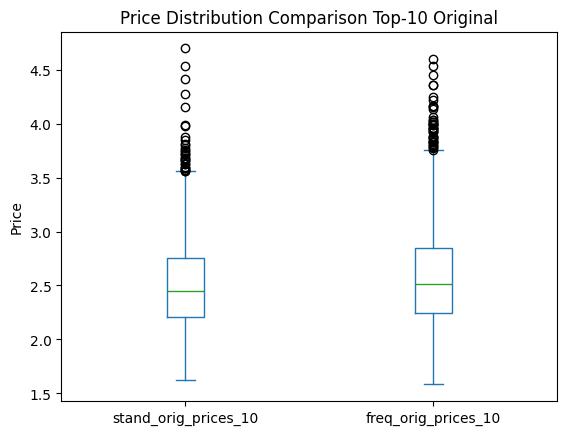

In [ ]:
stand_orig_prices_10 = df_stand_orig_10.groupby('idx_user')['item_price'].mean().rename('stand_orig_prices_10')
freq_orig_prices_10 = df_freq_orig_10.groupby('idx_user')['item_price'].mean().rename('freq_orig_prices_10')
price_orig_comparison_10 = pd.concat([stand_orig_prices_10, freq_orig_prices_10], axis=1)

price_orig_comparison_10['price_diff'] = price_orig_comparison_10['stand_orig_prices_10'] - price_orig_comparison_10['freq_orig_prices_10']

t_stat, p_value = ttest_rel(price_orig_comparison_10['stand_orig_prices_10'], price_orig_comparison_10['freq_orig_prices_10'])
print(f"Paired t-test: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

plt.figure(figsize=(8, 5))
price_orig_comparison_10[['stand_orig_prices_10', 'freq_orig_prices_10']].plot(kind='box', title='Price Distribution Comparison Top-10 Original')
plt.ylabel('Price')
plt.show()

Paired t-test: t-statistic = -13.230, p-value = 0.000


<Figure size 800x500 with 0 Axes>

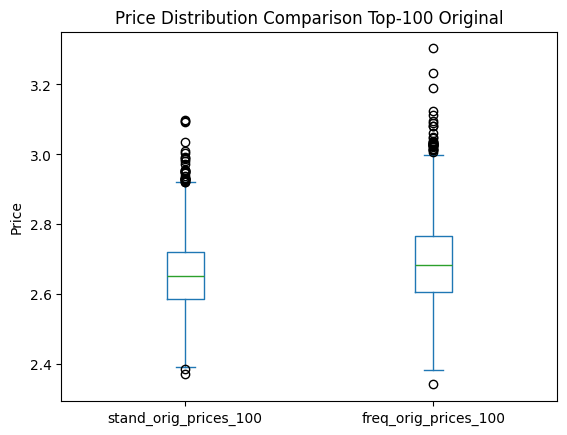

In [ ]:
stand_orig_prices_100 = df_stand_orig_100.groupby('idx_user')['item_price'].mean().rename('stand_orig_prices_100')
freq_orig_prices_100 = df_freq_orig_100.groupby('idx_user')['item_price'].mean().rename('freq_orig_prices_100')
price_orig_comparison_100 = pd.concat([stand_orig_prices_100, freq_orig_prices_100], axis=1)

price_orig_comparison_100['price_diff'] = price_orig_comparison_100['stand_orig_prices_100'] - price_orig_comparison_100['freq_orig_prices_100']

t_stat, p_value = ttest_rel(price_orig_comparison_100['stand_orig_prices_100'], price_orig_comparison_100['freq_orig_prices_100'])
print(f"Paired t-test: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

plt.figure(figsize=(8, 5))
price_orig_comparison_100[['stand_orig_prices_100', 'freq_orig_prices_100']].plot(kind='box', title='Price Distribution Comparison Top-100 Original')
plt.ylabel('Price')
plt.show()

Paired t-test: t-statistic = 9.252, p-value = 0.000


<Figure size 800x500 with 0 Axes>

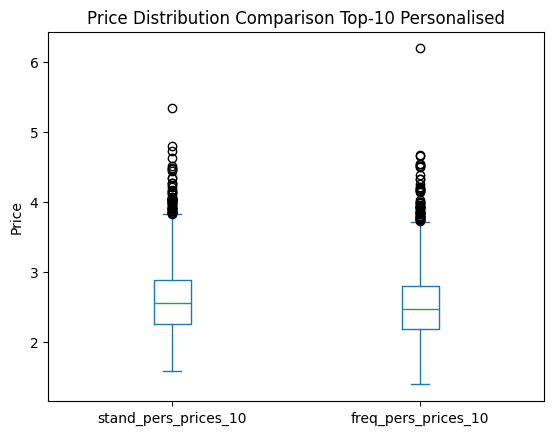

In [ ]:
stand_pers_prices_10 = df_stand_pers_10.groupby('idx_user')['item_price'].mean().rename('stand_pers_prices_10')
freq_pers_prices_10 = df_freq_pers_10.groupby('idx_user')['item_price'].mean().rename('freq_pers_prices_10')
price_pers_comparison_10 = pd.concat([stand_pers_prices_10, freq_pers_prices_10], axis=1)

price_pers_comparison_10['price_diff'] = price_pers_comparison_10['stand_pers_prices_10'] - price_pers_comparison_10['freq_pers_prices_10']

t_stat, p_value = ttest_rel(price_pers_comparison_10['stand_pers_prices_10'], price_pers_comparison_10['freq_pers_prices_10'])
print(f"Paired t-test: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

plt.figure(figsize=(8, 5))
price_pers_comparison_10[['stand_pers_prices_10', 'freq_pers_prices_10']].plot(kind='box', title='Price Distribution Comparison Top-10 Personalised')
plt.ylabel('Price')
plt.show()

Paired t-test: t-statistic = -5.637, p-value = 0.000


<Figure size 800x500 with 0 Axes>

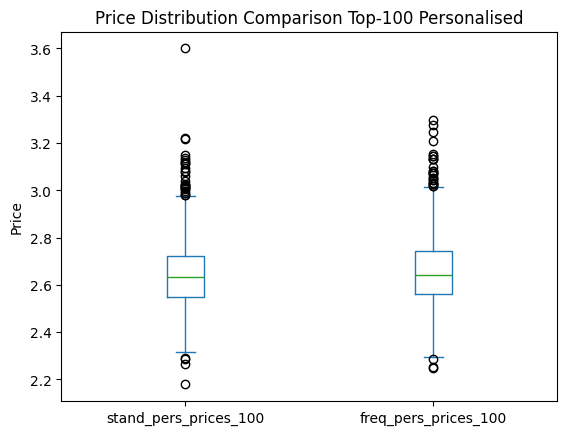

In [ ]:
stand_pers_prices_100 = df_stand_pers_100.groupby('idx_user')['item_price'].mean().rename('stand_pers_prices_100')
freq_pers_prices_100 = df_freq_pers_100.groupby('idx_user')['item_price'].mean().rename('freq_pers_prices_100')
price_pers_comparison_100 = pd.concat([stand_pers_prices_100, freq_pers_prices_100], axis=1)

price_pers_comparison_100['price_diff'] = price_pers_comparison_100['stand_pers_prices_100'] - price_pers_comparison_100['freq_pers_prices_100']

t_stat, p_value = ttest_rel(price_pers_comparison_100['stand_pers_prices_100'], price_pers_comparison_100['freq_pers_prices_100'])
print(f"Paired t-test: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

plt.figure(figsize=(8, 5))
price_pers_comparison_100[['stand_pers_prices_100', 'freq_pers_prices_100']].plot(kind='box', title='Price Distribution Comparison Top-100 Personalised')
plt.ylabel('Price')
plt.show()

In [ ]:
def compute_personalization(df):
    users = df['idx_user'].unique()
    user_pairs = list(combinations(users, 2))
    jaccard_scores = []
    
    for u1, u2 in user_pairs:
        items_u1 = set(df[df['idx_user'] == u1]['idx_item'])
        items_u2 = set(df[df['idx_user'] == u2]['idx_item'])
        intersection = len(items_u1 & items_u2)
        union = len(items_u1 | items_u2)
        jaccard = intersection / union if union != 0 else 0
        jaccard_scores.append(jaccard)
    
    return 1 - np.mean(jaccard_scores)

personalization_stand_orig_10 = compute_personalization(df_stand_orig_10)
personalization_freq_orig_10 = compute_personalization(df_freq_orig_10)

print(f"Personalization Scores (0=identical, 1=unique) for Top-10 Original:")
print(f"Standard approach: {personalization_stand_orig_10:.3f}")
print(f"Frequency approach: {personalization_freq_orig_10:.3f}")

Personalization Scores (0=identical, 1=unique) for Top-10 Original:
Standard approach: 0.820
Frequency approach: 0.870


In [ ]:
def compute_personalization(df):
    users = df['idx_user'].unique()
    user_pairs = list(combinations(users, 2))
    jaccard_scores = []
    
    for u1, u2 in user_pairs:
        items_u1 = set(df[df['idx_user'] == u1]['idx_item'])
        items_u2 = set(df[df['idx_user'] == u2]['idx_item'])
        intersection = len(items_u1 & items_u2)
        union = len(items_u1 | items_u2)
        jaccard = intersection / union if union != 0 else 0
        jaccard_scores.append(jaccard)
    
    return 1 - np.mean(jaccard_scores)

personalization_stand_pers_10 = compute_personalization(df_stand_pers_10)
personalization_freq_pers_10 = compute_personalization(df_freq_pers_10)

print(f"Personalization Scores (0=identical, 1=unique) for Top-10 Personalised:")
print(f"Standard approach: {personalization_stand_pers_10:.3f}")
print(f"Frequency approach: {personalization_freq_pers_10:.3f}")

Personalization Scores (0=identical, 1=unique) for Top-10 Personalised:
Standard approach: 0.943
Frequency approach: 0.912


This part analyses the difference in recommendation lists produced by two types of DLCE predict (with ITE(R))

In [ ]:
df_stand_orig_10 = pd.read_csv("./results/default/mod/d/mod/pred/df_ranking_10.csv")
df_stand_pers_10 = pd.read_csv("./results/default/mod/p/mod/pred/df_ranking_10.csv")
df_freq_orig_10 = pd.read_csv("./results/default/mod/d/mod/pred_freq/df_ranking_10.csv")
df_freq_pers_10 = pd.read_csv("./results/default/mod/p/mod/pred_freq/df_ranking_10.csv")

df_stand_orig_100 = pd.read_csv("./results/default/mod/d/mod/pred/df_ranking_100.csv")
df_stand_pers_100 = pd.read_csv("./results/default/mod/p/mod/pred/df_ranking_100.csv")
df_freq_orig_100 = pd.read_csv("./results/default/mod/d/mod/pred_freq/df_ranking_100.csv")
df_freq_pers_100 = pd.read_csv("./results/default/mod/p/mod/pred_freq/df_ranking_100.csv")

In [60]:
print("Average price of top-10 recommended items in $ with standard DLCE prediction for each user (orig): \n", np.average(df_stand_orig_10.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_stand_orig_10.groupby('idx_user')['item_price'].mean()), end = "\n\n")
print("Average price of top-10 recommended items in $ with frequency DLCE prediction for each user (orig): \n", np.average(df_freq_orig_10.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_freq_orig_10.groupby('idx_user')['item_price'].mean()), end = "\n\n")
print("Average price of top-10 recommended items in $ with standard DLCE prediction for each user (personalised): \n", np.average(df_stand_pers_10.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_stand_pers_10.groupby('idx_user')['item_price'].mean()), end = "\n\n")
print("Average price of top-10 recommended items in $ with frequency DLCE prediction for each user (personalised): \n", np.average(df_freq_pers_10.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_freq_pers_10.groupby('idx_user')['item_price'].mean()), end = "\n\n")

Average price of top-10 recommended items in $ with standard DLCE prediction for each user (orig): 
 2.5188382486429735 +- 0.3944623192554724

Average price of top-10 recommended items in $ with frequency DLCE prediction for each user (orig): 
 2.598025710753855 +- 0.49056389839249764

Average price of top-10 recommended items in $ with standard DLCE prediction for each user (personalised): 
 2.7477876972217237 +- 0.5434899293726867

Average price of top-10 recommended items in $ with frequency DLCE prediction for each user (personalised): 
 2.6229319591471527 +- 0.5311999767924716



In [61]:
print("Average price of top-100 recommended items in $ for standard DLCE prediction (orig): \n", np.average(df_stand_orig_100.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_stand_orig_100.groupby('idx_user')['item_price'].mean()), end = "\n\n")
print("Average price of top-100 recommended items in $ for frequency DLCE prediction (orig): \n", np.average(df_freq_orig_100.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_freq_orig_100.groupby('idx_user')['item_price'].mean()), end = "\n\n")
print("Average price of top-100 recommended items in $ for standard DLCE prediction (personalised): \n", np.average(df_stand_pers_100.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_stand_pers_100.groupby('idx_user')['item_price'].mean()), end = "\n\n")
print("Average price of top-100 recommended items in $ for frequency DLCE prediction (personalised): \n", np.average(df_freq_pers_100.groupby('idx_user')['item_price'].mean()), "+-", np.std(df_freq_pers_100.groupby('idx_user')['item_price'].mean()), end = "\n\n")

Average price of top-100 recommended items in $ for standard DLCE prediction (orig): 
 2.690354329428236 +- 0.11842404652038888

Average price of top-100 recommended items in $ for frequency DLCE prediction (orig): 
 2.7350308170590614 +- 0.14165899026881837

Average price of top-100 recommended items in $ for standard DLCE prediction (personalised): 
 2.765870038321528 +- 0.15113693740134843

Average price of top-100 recommended items in $ for frequency DLCE prediction (personalised): 
 2.7627770746430094 +- 0.1614125070466859



Paired t-test: t-statistic = -7.183, p-value = 0.000


<Figure size 800x500 with 0 Axes>

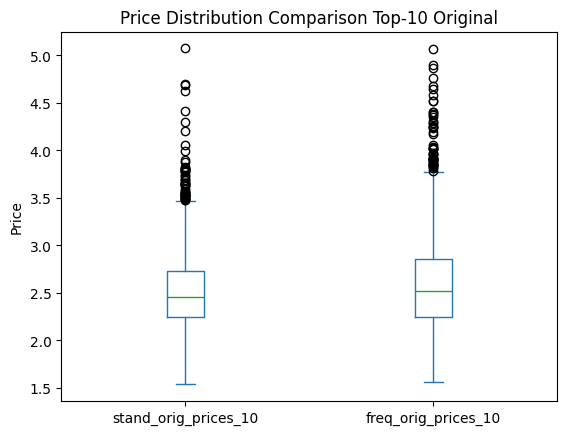

In [ ]:
stand_orig_prices_10 = df_stand_orig_10.groupby('idx_user')['item_price'].mean().rename('stand_orig_prices_10')
freq_orig_prices_10 = df_freq_orig_10.groupby('idx_user')['item_price'].mean().rename('freq_orig_prices_10')
price_orig_comparison_10 = pd.concat([stand_orig_prices_10, freq_orig_prices_10], axis=1)

price_orig_comparison_10['price_diff'] = price_orig_comparison_10['stand_orig_prices_10'] - price_orig_comparison_10['freq_orig_prices_10']

t_stat, p_value = ttest_rel(price_orig_comparison_10['stand_orig_prices_10'], price_orig_comparison_10['freq_orig_prices_10'])
print(f"Paired t-test: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

plt.figure(figsize=(8, 5))
price_orig_comparison_10[['stand_orig_prices_10', 'freq_orig_prices_10']].plot(kind='box', title='Price Distribution Comparison Top-10 Original')
plt.ylabel('Price')
plt.show()

Paired t-test: t-statistic = -14.519, p-value = 0.000


<Figure size 800x500 with 0 Axes>

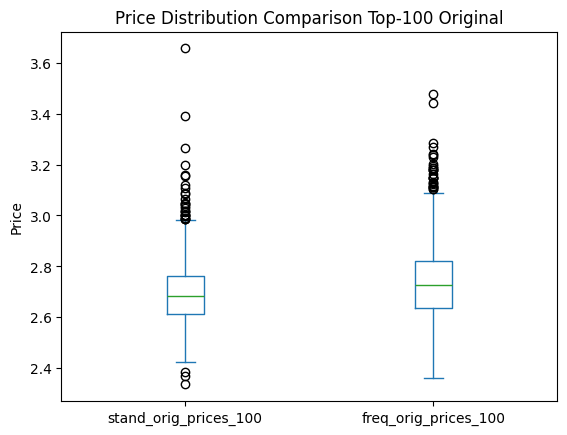

In [ ]:
stand_orig_prices_100 = df_stand_orig_100.groupby('idx_user')['item_price'].mean().rename('stand_orig_prices_100')
freq_orig_prices_100 = df_freq_orig_100.groupby('idx_user')['item_price'].mean().rename('freq_orig_prices_100')
price_orig_comparison_100 = pd.concat([stand_orig_prices_100, freq_orig_prices_100], axis=1)

price_orig_comparison_100['price_diff'] = price_orig_comparison_100['stand_orig_prices_100'] - price_orig_comparison_100['freq_orig_prices_100']

t_stat, p_value = ttest_rel(price_orig_comparison_100['stand_orig_prices_100'], price_orig_comparison_100['freq_orig_prices_100'])
print(f"Paired t-test: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

plt.figure(figsize=(8, 5))
price_orig_comparison_100[['stand_orig_prices_100', 'freq_orig_prices_100']].plot(kind='box', title='Price Distribution Comparison Top-100 Original')
plt.ylabel('Price')
plt.show()

Paired t-test: t-statistic = 12.006, p-value = 0.000


<Figure size 800x500 with 0 Axes>

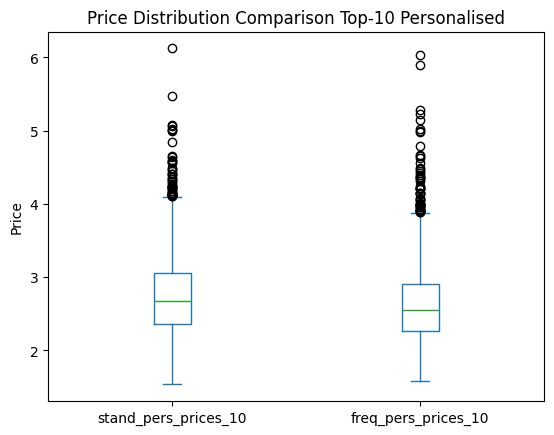

In [ ]:
stand_pers_prices_10 = df_stand_pers_10.groupby('idx_user')['item_price'].mean().rename('stand_pers_prices_10')
freq_pers_prices_10 = df_freq_pers_10.groupby('idx_user')['item_price'].mean().rename('freq_pers_prices_10')
price_pers_comparison_10 = pd.concat([stand_pers_prices_10, freq_pers_prices_10], axis=1)

price_pers_comparison_10['price_diff'] = price_pers_comparison_10['stand_pers_prices_10'] - price_pers_comparison_10['freq_pers_prices_10']

t_stat, p_value = ttest_rel(price_pers_comparison_10['stand_pers_prices_10'], price_pers_comparison_10['freq_pers_prices_10'])
print(f"Paired t-test: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

plt.figure(figsize=(8, 5))
price_pers_comparison_10[['stand_pers_prices_10', 'freq_pers_prices_10']].plot(kind='box', title='Price Distribution Comparison Top-10 Personalised')
plt.ylabel('Price')
plt.show()

Paired t-test: t-statistic = 0.920, p-value = 0.358


<Figure size 800x500 with 0 Axes>

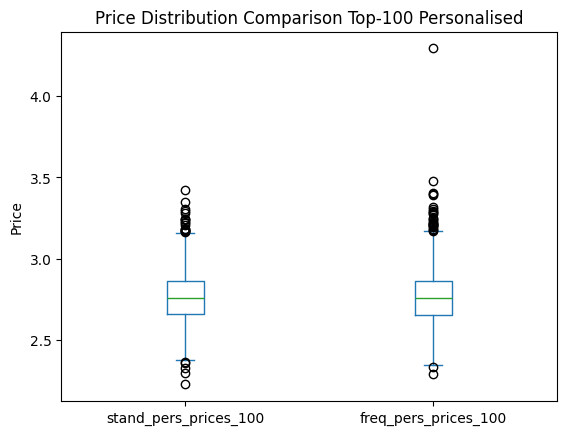

In [65]:
stand_pers_prices_100 = df_stand_pers_100.groupby('idx_user')['item_price'].mean().rename('stand_pers_prices_100')
freq_pers_prices_100 = df_freq_pers_100.groupby('idx_user')['item_price'].mean().rename('freq_pers_prices_100')
price_pers_comparison_100 = pd.concat([stand_pers_prices_100, freq_pers_prices_100], axis=1)

price_pers_comparison_100['price_diff'] = price_pers_comparison_100['stand_pers_prices_100'] - price_pers_comparison_100['freq_pers_prices_100']

t_stat, p_value = ttest_rel(price_pers_comparison_100['stand_pers_prices_100'], price_pers_comparison_100['freq_pers_prices_100'])
print(f"Paired t-test: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

# Visualization
plt.figure(figsize=(8, 5))
price_pers_comparison_100[['stand_pers_prices_100', 'freq_pers_prices_100']].plot(kind='box', title='Price Distribution Comparison Top-100 Personalised')
plt.ylabel('Price')
plt.show()

In [ ]:
def compute_personalization(df):
    users = df['idx_user'].unique()
    user_pairs = list(combinations(users, 2))
    jaccard_scores = []
    
    for u1, u2 in user_pairs:
        items_u1 = set(df[df['idx_user'] == u1]['idx_item'])
        items_u2 = set(df[df['idx_user'] == u2]['idx_item'])
        intersection = len(items_u1 & items_u2)
        union = len(items_u1 | items_u2)
        jaccard = intersection / union if union != 0 else 0
        jaccard_scores.append(jaccard)
    
    return 1 - np.mean(jaccard_scores)

personalization_stand_orig_10 = compute_personalization(df_stand_orig_10)
personalization_freq_orig_10 = compute_personalization(df_freq_orig_10)

print(f"Personalization Scores (0=identical, 1=unique) for Top-10 Original:")
print(f"Standard approach: {personalization_stand_orig_10:.3f}")
print(f"Frequency approach: {personalization_freq_orig_10:.3f}")

Personalization Scores (0=identical, 1=unique) for Top-10 Original:
Standard approach: 0.769
Frequency approach: 0.877


In [ ]:
def compute_personalization(df):
    users = df['idx_user'].unique()
    user_pairs = list(combinations(users, 2))
    jaccard_scores = []
    
    for u1, u2 in user_pairs:
        items_u1 = set(df[df['idx_user'] == u1]['idx_item'])
        items_u2 = set(df[df['idx_user'] == u2]['idx_item'])
        intersection = len(items_u1 & items_u2)
        union = len(items_u1 | items_u2)
        jaccard = intersection / union if union != 0 else 0
        jaccard_scores.append(jaccard)
    
    return 1 - np.mean(jaccard_scores)

personalization_stand_pers_10 = compute_personalization(df_stand_pers_10)
personalization_freq_pers_10 = compute_personalization(df_freq_pers_10)

print(f"Personalization Scores (0=identical, 1=unique) for Top-10 Personalised:")
print(f"Standard approach: {personalization_stand_pers_10:.3f}")
print(f"Frequency approach: {personalization_freq_pers_10:.3f}")

Personalization Scores (0=identical, 1=unique) for Top-10 Personalised:
Standard approach: 0.928
Frequency approach: 0.912


## Relevance-uplift relationship graph

In [ ]:
df_orig_pred = pd.read_csv("./results/default/orig/d/orig/pred/df_sorted.csv")
df_orig_pred_freq = pd.read_csv("./results/default/orig/d/orig/pred/df_sorted.csv")
df_orig_pp = pd.read_csv("./results/default/orig/d/orig/personal_popular/df_sorted.csv")
df_orig_pred = df_orig_pred[df_orig_pred.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'pred']]
df_orig_pred_freq = df_orig_pred_freq[df_orig_pred_freq.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'pred_freq']]
df_orig_pp = df_orig_pp[df_orig_pp.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'personal_popular']]
df_orig_pred = df_orig_pred.sample(n = 1000)
df_orig_pred_freq = df_orig_pred_freq.sample(n = 1000)
df_orig_pp = df_orig_pp.sample(n = 1000)
df_orig_pred['pred'] = (df_orig_pred['pred'] - df_orig_pred['pred'].min()) / (df_orig_pred['pred'].max() - df_orig_pred['pred'].min())
df_orig_pred_freq['pred_freq'] = (df_orig_pred_freq['pred_freq'] - df_orig_pred_freq['pred_freq'].min()) / (df_orig_pred_freq['pred_freq'].max() - df_orig_pred_freq['pred_freq'].min())
df_orig_pp['personal_popular'] = (df_orig_pp['personal_popular'] - df_orig_pp['personal_popular'].min()) / (df_orig_pp['personal_popular'].max() - df_orig_pp['personal_popular'].min())

In [ ]:
df_orig_pred = pd.read_csv("./results/default/orig/p/orig/pred/df_sorted.csv")
df_orig_pred_freq = pd.read_csv("./results/default/orig/p/orig/pred/df_sorted.csv")
df_orig_pp = pd.read_csv("./results/default/orig/p/orig/personal_popular/df_sorted.csv")
df_orig_pred = df_orig_pred[df_orig_pred.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'pred']]
df_orig_pred_freq = df_orig_pred_freq[df_orig_pred_freq.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'pred_freq']]
df_orig_pp = df_orig_pp[df_orig_pp.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'personal_popular']]
df_orig_pred = df_orig_pred.sample(n = 1000)
df_orig_pred_freq = df_orig_pred_freq.sample(n = 1000)
df_orig_pp = df_orig_pp.sample(n = 1000)
df_orig_pred['pred'] = (df_orig_pred['pred'] - df_orig_pred['pred'].min()) / (df_orig_pred['pred'].max() - df_orig_pred['pred'].min())
df_orig_pred_freq['pred_freq'] = (df_orig_pred_freq['pred_freq'] - df_orig_pred_freq['pred_freq'].min()) / (df_orig_pred_freq['pred_freq'].max() - df_orig_pred_freq['pred_freq'].min())
df_orig_pp['personal_popular'] = (df_orig_pp['personal_popular'] - df_orig_pp['personal_popular'].min()) / (df_orig_pp['personal_popular'].max() - df_orig_pp['personal_popular'].min())

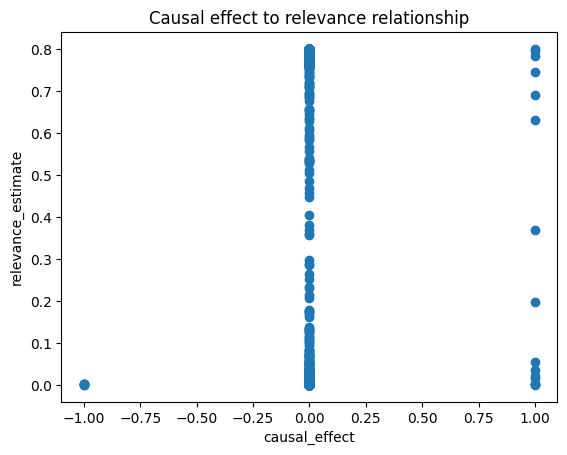

In [97]:
plt.scatter(x = df_orig_pred['causal_effect'], y = df_orig_pred['relevance_estimate'])
plt.title("Causal effect to relevance relationship")
plt.xlabel('causal_effect')
plt.ylabel('relevance_estimate')
plt.show()

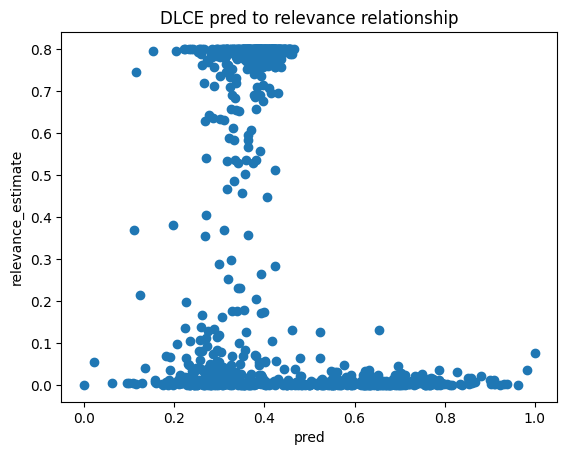

In [98]:
plt.scatter(x = df_orig_pred['pred'], y = df_orig_pred['relevance_estimate'])
plt.title("DLCE pred to relevance relationship")
plt.xlabel('pred')
plt.ylabel('relevance_estimate')
plt.show()

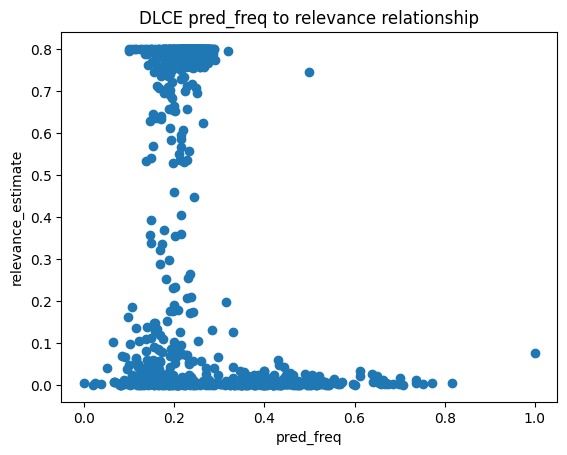

In [99]:
plt.scatter(x = df_orig_pred_freq['pred_freq'], y = df_orig_pred_freq['relevance_estimate'])
plt.title("DLCE pred_freq to relevance relationship")
plt.xlabel('pred_freq')
plt.ylabel('relevance_estimate')
plt.show()

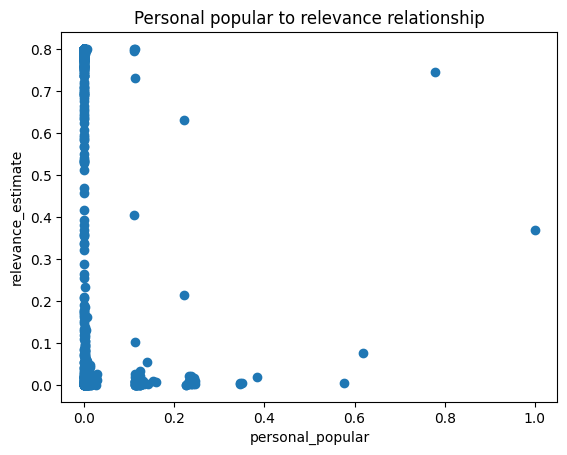

In [100]:
plt.scatter(x = df_orig_pp['personal_popular'], y = df_orig_pp['relevance_estimate'])
plt.title("Personal popular to relevance relationship")
plt.xlabel('personal_popular')
plt.ylabel('relevance_estimate')
plt.show()

In [ ]:
df_orig_pred = pd.read_csv("./results/default/mod/d/orig/pred/df_sorted.csv")
df_orig_pred_freq = pd.read_csv("./results/default/mod/d/orig/pred/df_sorted.csv")
df_orig_pp = pd.read_csv("./results/default/mod/d/orig/personal_popular/df_sorted.csv")
df_orig_pred = df_orig_pred[df_orig_pred.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'pred']]
df_orig_pred_freq = df_orig_pred_freq[df_orig_pred_freq.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'pred_freq']]
df_orig_pp = df_orig_pp[df_orig_pp.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'personal_popular']]
df_orig_pred = df_orig_pred.sample(n = 1000)
df_orig_pred_freq = df_orig_pred_freq.sample(n = 1000)
df_orig_pp = df_orig_pp.sample(n = 1000)
df_orig_pred['pred'] = (df_orig_pred['pred'] - df_orig_pred['pred'].min()) / (df_orig_pred['pred'].max() - df_orig_pred['pred'].min())
df_orig_pred_freq['pred_freq'] = (df_orig_pred_freq['pred_freq'] - df_orig_pred_freq['pred_freq'].min()) / (df_orig_pred_freq['pred_freq'].max() - df_orig_pred_freq['pred_freq'].min())
df_orig_pp['personal_popular'] = (df_orig_pp['personal_popular'] - df_orig_pp['personal_popular'].min()) / (df_orig_pp['personal_popular'].max() - df_orig_pp['personal_popular'].min())

In [ ]:
df_orig_pred = pd.read_csv("./results/default/mod/p/orig/pred/df_sorted.csv")
df_orig_pred_freq = pd.read_csv("./results/default/mod/p/orig/pred/df_sorted.csv")
df_orig_pp = pd.read_csv("./results/default/mod/p/orig/personal_popular/df_sorted.csv")
df_orig_pred = df_orig_pred[df_orig_pred.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'pred']]
df_orig_pred_freq = df_orig_pred_freq[df_orig_pred_freq.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'pred_freq']]
df_orig_pp = df_orig_pp[df_orig_pp.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'personal_popular']]
df_orig_pred = df_orig_pred.sample(n = 1000)
df_orig_pred_freq = df_orig_pred_freq.sample(n = 1000)
df_orig_pp = df_orig_pp.sample(n = 1000)
df_orig_pred['pred'] = (df_orig_pred['pred'] - df_orig_pred['pred'].min()) / (df_orig_pred['pred'].max() - df_orig_pred['pred'].min())
df_orig_pred_freq['pred_freq'] = (df_orig_pred_freq['pred_freq'] - df_orig_pred_freq['pred_freq'].min()) / (df_orig_pred_freq['pred_freq'].max() - df_orig_pred_freq['pred_freq'].min())
df_orig_pp['personal_popular'] = (df_orig_pp['personal_popular'] - df_orig_pp['personal_popular'].min()) / (df_orig_pp['personal_popular'].max() - df_orig_pp['personal_popular'].min())

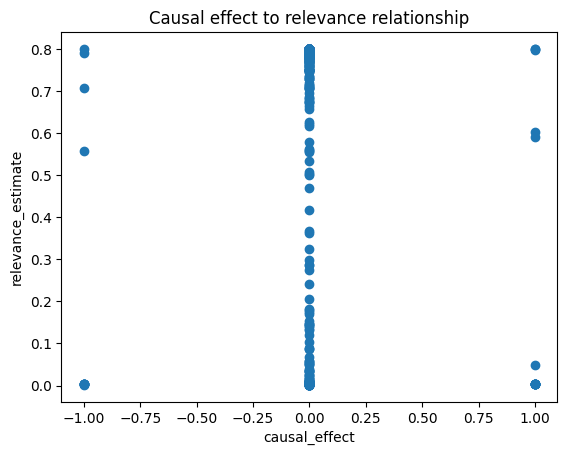

In [102]:
plt.scatter(x = df_orig_pred['causal_effect'], y = df_orig_pred['relevance_estimate'])
plt.title("Causal effect to relevance relationship")
plt.xlabel('causal_effect')
plt.ylabel('relevance_estimate')
plt.show()

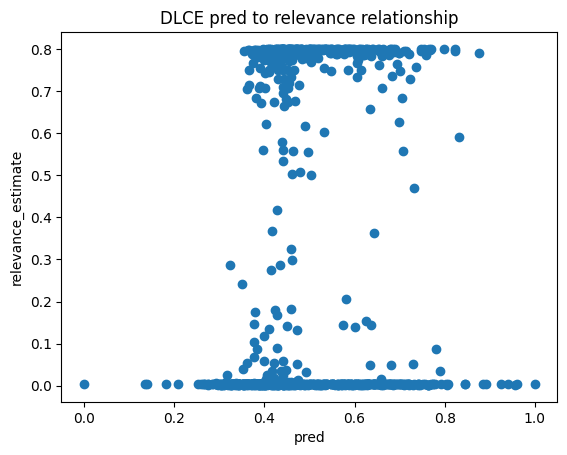

In [103]:
plt.scatter(x = df_orig_pred['pred'], y = df_orig_pred['relevance_estimate'])
plt.title("DLCE pred to relevance relationship")
plt.xlabel('pred')
plt.ylabel('relevance_estimate')
plt.show()

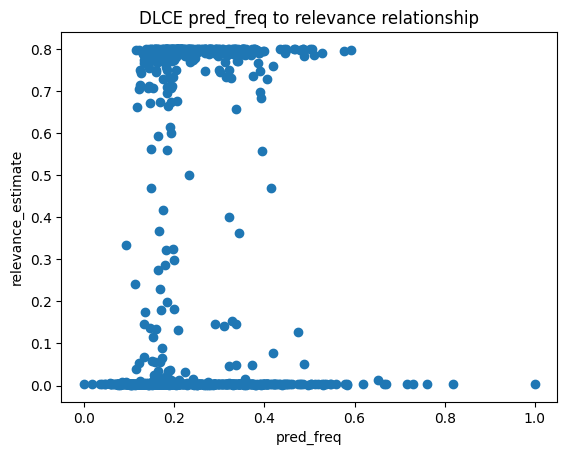

In [104]:
plt.scatter(x = df_orig_pred_freq['pred_freq'], y = df_orig_pred_freq['relevance_estimate'])
plt.title("DLCE pred_freq to relevance relationship")
plt.xlabel('pred_freq')
plt.ylabel('relevance_estimate')
plt.show()

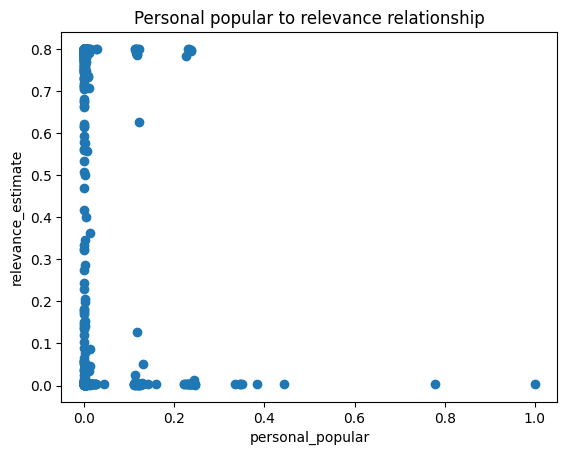

In [105]:
plt.scatter(x = df_orig_pp['personal_popular'], y = df_orig_pp['relevance_estimate'])
plt.title("Personal popular to relevance relationship")
plt.xlabel('personal_popular')
plt.ylabel('relevance_estimate')
plt.show()

In [ ]:
df_orig_pred = pd.read_csv("./results/default/mod/d/mod/pred/df_sorted.csv")
df_orig_pred_freq = pd.read_csv("./results/default/mod/d/mod/pred/df_sorted.csv")
df_orig_pp = pd.read_csv("./results/default/mod/d/mod/personal_popular/df_sorted.csv")
df_orig_pred = df_orig_pred[df_orig_pred.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'pred']]
df_orig_pred_freq = df_orig_pred_freq[df_orig_pred_freq.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'pred_freq']]
df_orig_pp = df_orig_pp[df_orig_pp.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'personal_popular']]
df_orig_pred = df_orig_pred.sample(n = 1000)
df_orig_pred_freq = df_orig_pred_freq.sample(n = 1000)
df_orig_pp = df_orig_pp.sample(n = 1000)
df_orig_pred['pred'] = (df_orig_pred['pred'] - df_orig_pred['pred'].min()) / (df_orig_pred['pred'].max() - df_orig_pred['pred'].min())
df_orig_pred_freq['pred_freq'] = (df_orig_pred_freq['pred_freq'] - df_orig_pred_freq['pred_freq'].min()) / (df_orig_pred_freq['pred_freq'].max() - df_orig_pred_freq['pred_freq'].min())
df_orig_pp['personal_popular'] = (df_orig_pp['personal_popular'] - df_orig_pp['personal_popular'].min()) / (df_orig_pp['personal_popular'].max() - df_orig_pp['personal_popular'].min())

In [ ]:
df_orig_pred = pd.read_csv("./results/default/mod/p/mod/pred/df_sorted.csv")
df_orig_pred_freq = pd.read_csv("./results/default/mod/p/mod/pred/df_sorted.csv")
df_orig_pp = pd.read_csv("./results/default/mod/p/mod/personal_popular/df_sorted.csv")
df_orig_pred = df_orig_pred[df_orig_pred.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'pred']]
df_orig_pred_freq = df_orig_pred_freq[df_orig_pred_freq.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'pred_freq']]
df_orig_pp = df_orig_pp[df_orig_pp.idx_user == 2308][['idx_item', 'item_title', 'causal_effect', 'relevance_estimate', 'personal_popular']]
df_orig_pred = df_orig_pred.sample(n = 1000)
df_orig_pred_freq = df_orig_pred_freq.sample(n = 1000)
df_orig_pp = df_orig_pp.sample(n = 1000)
df_orig_pred['pred'] = (df_orig_pred['pred'] - df_orig_pred['pred'].min()) / (df_orig_pred['pred'].max() - df_orig_pred['pred'].min())
df_orig_pred_freq['pred_freq'] = (df_orig_pred_freq['pred_freq'] - df_orig_pred_freq['pred_freq'].min()) / (df_orig_pred_freq['pred_freq'].max() - df_orig_pred_freq['pred_freq'].min())
df_orig_pp['personal_popular'] = (df_orig_pp['personal_popular'] - df_orig_pp['personal_popular'].min()) / (df_orig_pp['personal_popular'].max() - df_orig_pp['personal_popular'].min())

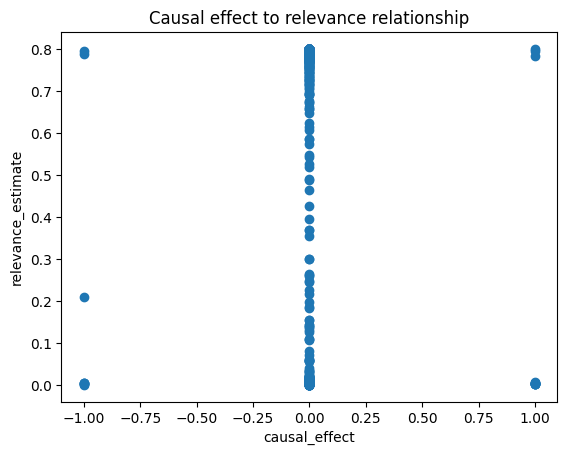

In [107]:
plt.scatter(x = df_orig_pred['causal_effect'], y = df_orig_pred['relevance_estimate'])
plt.title("Causal effect to relevance relationship")
plt.xlabel('causal_effect')
plt.ylabel('relevance_estimate')
plt.show()

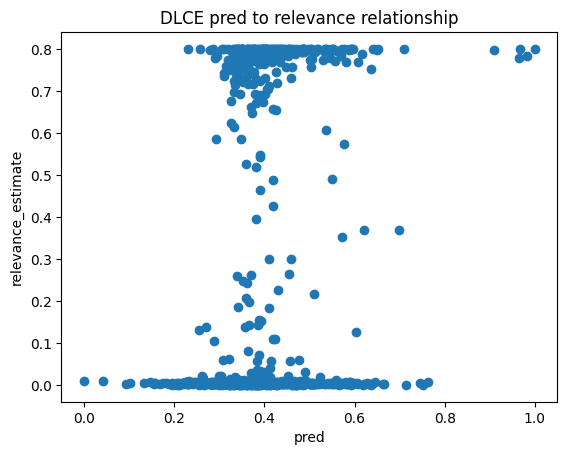

In [108]:
plt.scatter(x = df_orig_pred['pred'], y = df_orig_pred['relevance_estimate'])
plt.title("DLCE pred to relevance relationship")
plt.xlabel('pred')
plt.ylabel('relevance_estimate')
plt.show()

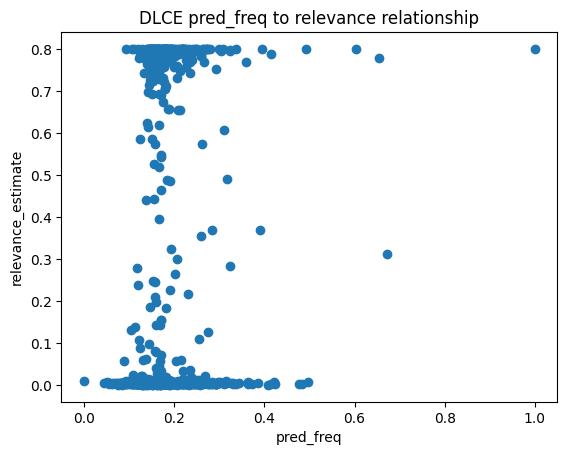

In [109]:
plt.scatter(x = df_orig_pred_freq['pred_freq'], y = df_orig_pred_freq['relevance_estimate'])
plt.title("DLCE pred_freq to relevance relationship")
plt.xlabel('pred_freq')
plt.ylabel('relevance_estimate')
plt.show()

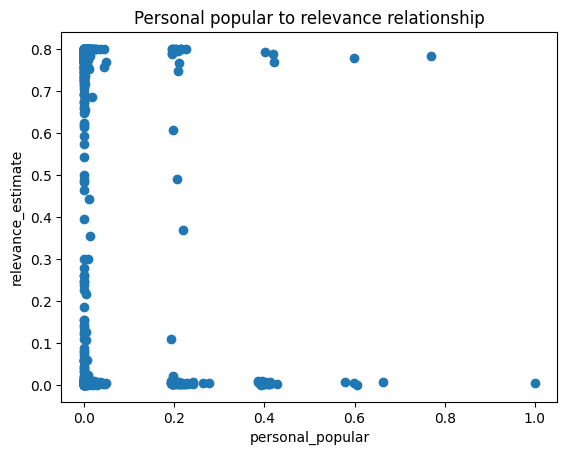

In [110]:
plt.scatter(x = df_orig_pp['personal_popular'], y = df_orig_pp['relevance_estimate'])
plt.title("Personal popular to relevance relationship")
plt.xlabel('personal_popular')
plt.ylabel('relevance_estimate')
plt.show()

# Qini and Uplift curves

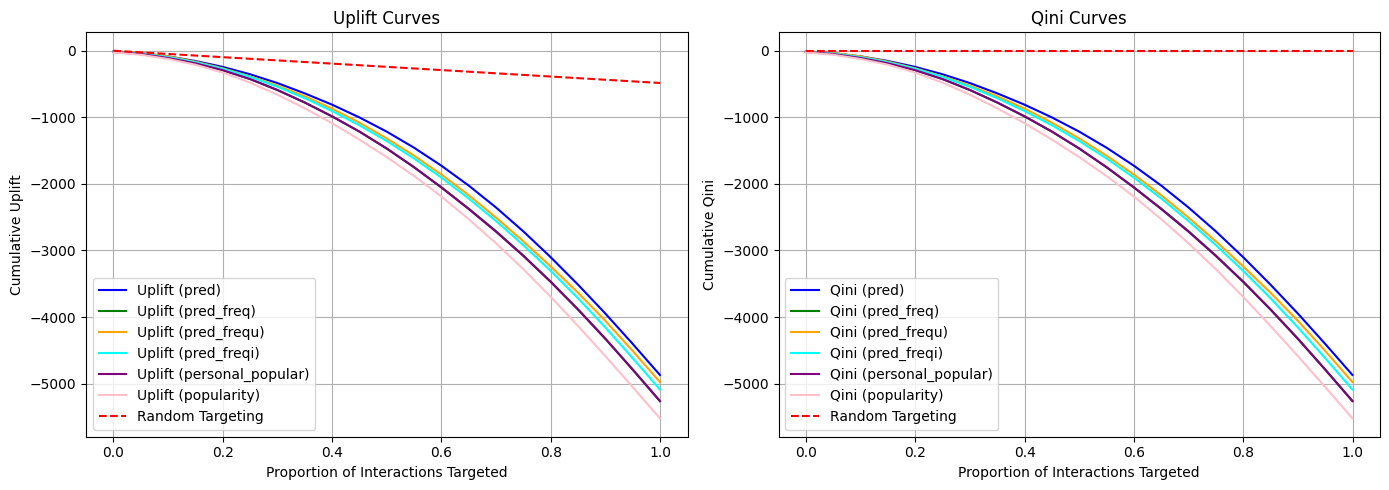

In [ ]:
result = pd.read_csv('./results/default/mod/f/orig/pred/df_sorted.csv')
data = {'pred': result.sort_values(by='pred', ascending=False).reset_index(drop=True), 
        'pred_freq': result.sort_values(by='pred_freq', ascending=False).reset_index(drop=True), 
        'pred_frequ': result.sort_values(by='pred_frequ', ascending=False).reset_index(drop=True), 
        'pred_freqi': result.sort_values(by='pred_freqi', ascending=False).reset_index(drop=True), 
        'personal_popular': result.sort_values(by='personal_popular', ascending=False).reset_index(drop=True), 
        'popularity': result.sort_values(by='popularity', ascending=False).reset_index(drop=True)}

total_interactions = len(result)
total_treated = result['treated'].sum()
total_control = total_interactions - total_treated

p_t = result[result['treated'] == 1]['outcome'].mean()
p_c = result[result['treated'] == 0]['outcome'].mean()
ate = p_t - p_c

min_group_size = 5
increment_size = max(int(total_interactions * 0.05), 1)
smoothing_window = 3 

score_columns = ['pred', 'pred_freq', 'pred_frequ', 'pred_freqi', 'personal_popular', 'popularity']
results = {score: {'proportions': [], 'cum_uplifts': [], 'cum_qinis': []} for score in score_columns}

for score_col in score_columns:

    df_sorted = data[score_col]
    proportions = []
    inc_uplifts = []
    inc_qinis = []
    
    for i in range(1, total_interactions + 1, increment_size):

        subset = df_sorted.iloc[:i]
        n_t = subset['treated'].sum()
        n_c = i - n_t
        y_t = subset[subset['treated'] == 1]['outcome'].sum()
        y_c = subset[subset['treated'] == 0]['outcome'].sum()
        
        if n_t >= min_group_size and n_c >= min_group_size:
            rate_t = min(max(y_t / n_t, 0.0001), 0.9999)
            rate_c = min(max(y_c / n_c, 0.0001), 0.9999)
            uplift = (rate_t - rate_c) * n_t
            qini = y_t - (n_t / n_c) * y_c if n_c > 0 else 0
        else:
            uplift = ate * n_t
            qini = 0
        
        inc_uplifts.append(uplift)
        inc_qinis.append(qini)
        proportions.append(i / total_interactions)
    
    inc_uplifts = pd.Series(inc_uplifts).rolling(window=smoothing_window, min_periods=1, center=True).mean().tolist()
    inc_qinis = pd.Series(inc_qinis).rolling(window=smoothing_window, min_periods=1, center=True).mean().tolist()
    
    cum_uplifts = np.cumsum(inc_uplifts).tolist()
    cum_qinis = np.cumsum(inc_qinis).tolist()
    
    results[score_col] = {
        'proportions': proportions,
        'cum_uplifts': cum_uplifts,
        'cum_qinis': cum_qinis
    }

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

colors = {'pred': 'blue', 'pred_freq': 'green', 'pred_frequ': 'orange', 
          'pred_freqi': 'cyan', 'personal_popular': 'purple', 'popularity': 'pink'}
for score_col in score_columns:
    ax1.plot(
        results[score_col]['proportions'],
        results[score_col]['cum_uplifts'],
        label=f'Uplift ({score_col})',
        color=colors[score_col]
    )
ax1.plot([0, 1], [0, ate * total_treated], linestyle='--', color='red', label='Random Targeting')
ax1.set_xlabel('Proportion of Interactions Targeted')
ax1.set_ylabel('Cumulative Uplift')
ax1.set_title('Uplift Curves')
ax1.legend()
ax1.grid(True)

for score_col in score_columns:
    ax2.plot(
        results[score_col]['proportions'],
        results[score_col]['cum_qinis'],
        label=f'Qini ({score_col})',
        color=colors[score_col]
    )
ax2.plot([0, 1], [0, 0], linestyle='--', color='red', label='Random Targeting')
ax2.set_xlabel('Proportion of Interactions Targeted')
ax2.set_ylabel('Cumulative Qini')
ax2.set_title('Qini Curves')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

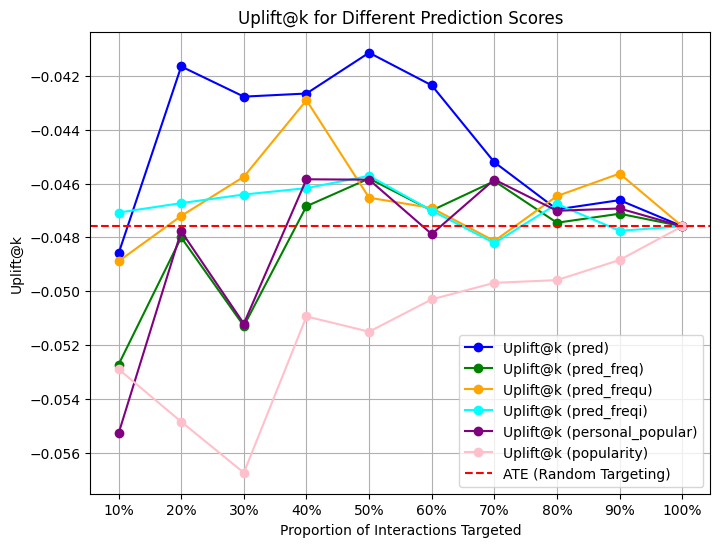

In [10]:
k_percentages = np.arange(10, 101, 10)
results = {score: {k: None for k in k_percentages} for score in score_columns}

for score_col in score_columns:
    
    df_sorted = data[score_col]
    
    for k_pct in k_percentages:
        
        k = int(total_interactions * k_pct / 100)
        if k == 0:
            k = 1
        
        subset = df_sorted.iloc[:k]
        n_t = subset['treated'].sum()
        n_c = k - n_t
        y_t = subset[subset['treated'] == 1]['outcome'].sum()
        y_c = subset[subset['treated'] == 0]['outcome'].sum()
        
        if n_t >= min_group_size and n_c >= min_group_size:
            rate_t = min(max(y_t / n_t, 0.0001), 0.9999) 
            rate_c = min(max(y_c / n_c, 0.0001), 0.9999)
            uplift_k = rate_t - rate_c
        else:
            uplift_k = ate 
        
        results[score_col][k_pct] = uplift_k

plt.figure(figsize=(8, 6))
for score_col in score_columns:
    plt.plot(
        k_percentages / 100,
        [results[score_col][k] for k in k_percentages],
        label=f'Uplift@k ({score_col})',
        color=colors[score_col],
        marker='o'
    )
plt.axhline(y=ate, color='red', linestyle='--', label='ATE (Random Targeting)')
plt.xlabel('Proportion of Interactions Targeted')
plt.ylabel('Uplift@k')
plt.title('Uplift@k for Different Prediction Scores')
plt.legend()
plt.grid(True)
plt.xticks(k_percentages / 100, [f"{k}%" for k in k_percentages])
plt.show()


pred:
Weighted Average Uplift: -0.0475

pred_freq:
Weighted Average Uplift: -0.0465

pred_frequ:
Weighted Average Uplift: -0.0474

pred_freqi:
Weighted Average Uplift: -0.0473

personal_popular:
Weighted Average Uplift: -0.0463

popularity:
Weighted Average Uplift: -0.0480


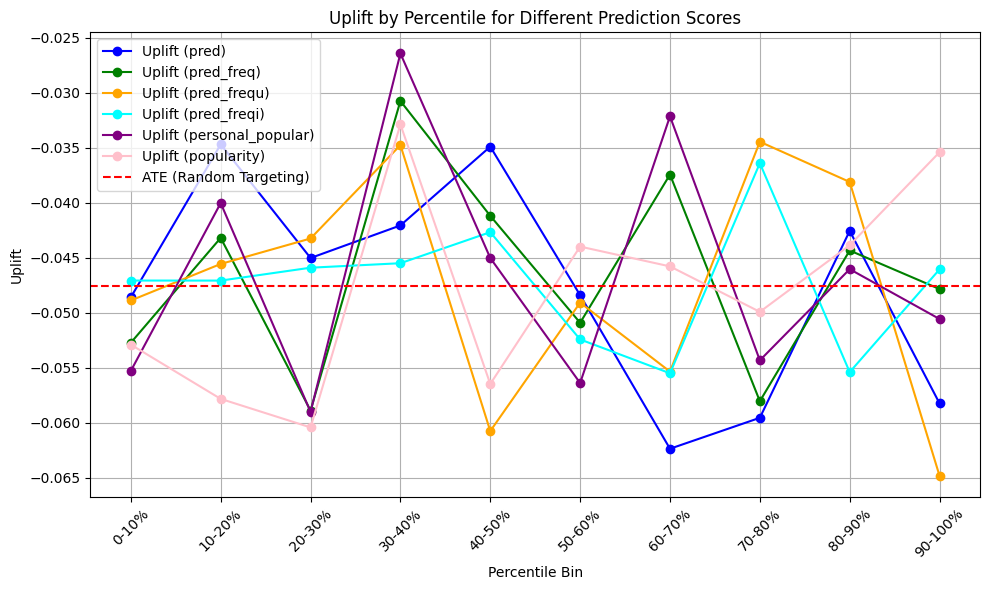

In [11]:
bin_size = 10
percentile_bins = np.arange(0, 101, bin_size) 

results = {
    score: {
        'uplift_by_percentile': {},
        'weighted_avg_uplift': None,
        'total_treated_in_bins': 0,
        'uplift_contributions': []
    } for score in score_columns
}

for score_col in score_columns:

    df_sorted = data[score_col]
    uplift_by_bin = {}
    uplift_contributions = []
    total_treated_in_bins = 0
    
    for i in range(len(percentile_bins) - 1):
        start_pct = percentile_bins[i]
        end_pct = percentile_bins[i + 1]
        
        start_idx = int(total_interactions * start_pct / 100)
        end_idx = int(total_interactions * end_pct / 100)
        if end_idx == start_idx:
            continue 
        
        subset = df_sorted.iloc[start_idx:end_idx]
        n_t = subset['treated'].sum()
        n_c = len(subset) - n_t
        y_t = subset[subset['treated'] == 1]['outcome'].sum()
        y_c = subset[subset['treated'] == 0]['outcome'].sum()
        
        if n_t >= min_group_size and n_c >= min_group_size:
            rate_t = min(max(y_t / n_t, 0.0001), 0.9999)  
            rate_c = min(max(y_c / n_c, 0.0001), 0.9999)
            uplift = rate_t - rate_c
        else:
            uplift = ate  
        
        bin_label = f"{start_pct}-{end_pct}%"
        uplift_by_bin[bin_label] = uplift
        
        contribution = uplift * n_t
        uplift_contributions.append(contribution)
        total_treated_in_bins += n_t
    
    if total_treated_in_bins > 0:
        weighted_avg_uplift = sum(uplift_contributions) / total_treated_in_bins
    else:
        weighted_avg_uplift = ate 
    
    results[score_col] = {
        'uplift_by_percentile': uplift_by_bin,
        'weighted_avg_uplift': weighted_avg_uplift,
        'total_treated_in_bins': total_treated_in_bins,
        'uplift_contributions': uplift_contributions
    }

for score_col in score_columns:
    print(f"\n{score_col}:")
    print(f"Weighted Average Uplift: {results[score_col]['weighted_avg_uplift']:.4f}")

plt.figure(figsize=(10, 6))
bin_labels = [f"{start}-{start+bin_size}%" for start in percentile_bins[:-1]]
x = np.arange(len(bin_labels))

for score_col in score_columns:
    uplifts = [results[score_col]['uplift_by_percentile'].get(label, ate) 
               for label in [f"{start}-{start+bin_size}%" for start in percentile_bins[:-1]]]
    plt.plot(x, uplifts, label=f'Uplift ({score_col})', color=colors[score_col], marker='o')

plt.axhline(y=ate, color='red', linestyle='--', label='ATE (Random Targeting)')
plt.xlabel('Percentile Bin')
plt.ylabel('Uplift')
plt.title('Uplift by Percentile for Different Prediction Scores')
plt.xticks(x, bin_labels, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='popularity', ylabel='Density'>

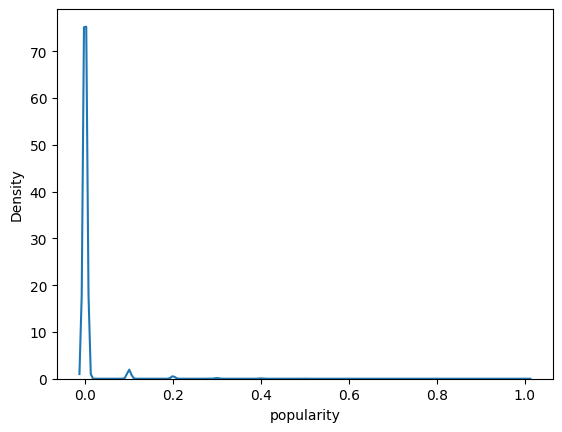

In [12]:
sns.kdeplot(result["popularity"])